In [1]:
%matplotlib inline

import sys
sys.path.append('../cholla-vis')

import matplotlib.pyplot as plt
import numpy as np

import sympy
sympy.init_printing()
import unyt

In [2]:
%load_ext autoreload
%autoreload 1
%aimport ICs

In [4]:
tmp = ICs.get_defaults()
halo = tmp['halo']
stellar_disk = tmp['stellar_disk']
razorthin_gas_disk =  tmp['razorthin_gas_disk']
starparticle_disk = tmp['starparticle_disk']

halo_gas_generator = ICs.HaloGasGenerator(
    gamma = 5.0/3.0,
    rcool = 100.0, # kpc
    T_0h = 1e6, # Kelvin
    rho_0h = 3e3, # gas eos normalized at 3e3 Msun/kpc^3 (about n_h = 10^-3.5)
    phi_fn = lambda r: (halo.potential(0.0, z_kpc = r) + 
                        stellar_disk.potential(0.0, z_kpc = r))
)

print(halo_gas_generator.calc_rho(100.0, True))
#print(halo_gas_generator.calc_rho(100.0, False))

-4.9914164550247385e-08
3000.0


../cholla-vis/ICs.py:406: RuntimeWarning: invalid value encountered in power
  1/gm1)


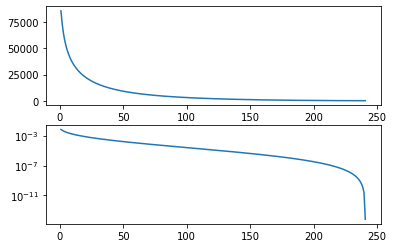

In [5]:
phi_fn = halo_gas_generator.phi_fn
r_vals = np.linspace(1.0, 1000.0, num = 1001)
fig,ax_arr = plt.subplots(2,1)
rho_vals = halo_gas_generator.calc_rho(r_vals)
ax_arr[0].plot(r_vals, rho_vals)
ax_arr[1].plot(r_vals, halo_gas_generator.calc_p_from_rho(rho_vals))
ax_arr[1].set_yscale('log')

In [82]:
def series_1st_order(x):
    return 1 - 0.5 * x

def series_2nd_order(x):
    return 1 + x * (-0.5 + x*(1/3))

def series_3rd_order(x):
    return 1 + x*(-0.5 + 
                  x*(1/3 - 
                     x*0.25))

def series_4th_order(x):
    return 1 + x*(-0.5 + 
                  x*(1/3 - 
                     x*(0.25 +
                        x*0.2)))

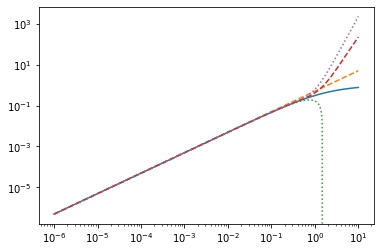

In [83]:
x_vals = np.geomspace(1e-6, 10, num = 800)
fig,ax = plt.subplots(1,1)

ax.plot(x_vals, 1 - np.log((1+x_vals)**(1/x_vals)))
ax.plot(x_vals, 1 - series_1st_order(x_vals), ls = '--')
ax.plot(x_vals, 1 - series_2nd_order(x_vals), ls = ':')
ax.plot(x_vals, 1 - series_3rd_order(x_vals), ls = '--')
ax.plot(x_vals, 1 - series_4th_order(x_vals), ls = ':')
ax.set_yscale('log')
ax.set_xscale('log')

In [68]:
series_2nd_order(x_vals) - series_4th_order(x_vals)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

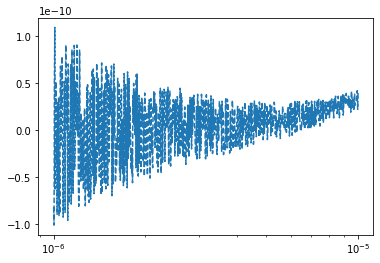

In [89]:
x_vals = np.geomspace(1e-6, 1e-5, num = 800)
y_vals = np.log((1+x_vals)**(1/x_vals))
fig,ax = plt.subplots(1,1)
#ylim = ax.get_ylim()
ax.plot(x_vals, y_vals - series_1st_order(x_vals), ls = '--')
#ax.plot(x_vals, y_vals - series_2nd_order(x_vals), ls = '--')
#ax.plot(x_vals, y_vals - series_4th_order(x_vals), ls = ':')
#ax.set_yscale('log')
ax.set_xscale('log')

In [91]:
def sympy_eval(x_vals):
    x = sympy.Symbol('x')
    expr = sympy.log(1+x)/x
    
    return np.array([
        float(expr.evalf(subs = {x : cur_x})) for cur_x in x_vals
    ])
sympy_eval(x_vals)

array([0.9999995 , 0.9999995 , 0.9999995 , 0.9999995 , 0.99999949,
       0.99999949, 0.99999949, 0.99999949, 0.99999949, 0.99999949,
       0.99999949, 0.99999948, 0.99999948, 0.99999948, 0.99999948,
       0.99999948, 0.99999948, 0.99999947, 0.99999947, 0.99999947,
       0.99999947, 0.99999947, 0.99999947, 0.99999947, 0.99999946,
       0.99999946, 0.99999946, 0.99999946, 0.99999946, 0.99999946,
       0.99999945, 0.99999945, 0.99999945, 0.99999945, 0.99999945,
       0.99999945, 0.99999945, 0.99999944, 0.99999944, 0.99999944,
       0.99999944, 0.99999944, 0.99999944, 0.99999943, 0.99999943,
       0.99999943, 0.99999943, 0.99999943, 0.99999943, 0.99999942,
       0.99999942, 0.99999942, 0.99999942, 0.99999942, 0.99999942,
       0.99999941, 0.99999941, 0.99999941, 0.99999941, 0.99999941,
       0.99999941, 0.9999994 , 0.9999994 , 0.9999994 , 0.9999994 ,
       0.9999994 , 0.9999994 , 0.99999939, 0.99999939, 0.99999939,
       0.99999939, 0.99999939, 0.99999938, 0.99999938, 0.99999

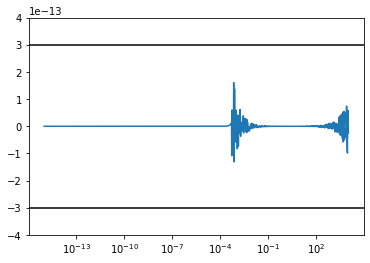

In [159]:



x_vals = np.geomspace(1e-15, 1e4, num=1101)
fig,ax = plt.subplots(1,1)

ref = sympy_eval(x_vals)

def naive(x_vals):
    return np.log((1+x_vals)**(1/x_vals))






ax.set_xscale('log')


ax.plot(x_vals, (ref - invx_times_ln_1px(x_vals)) / ref, ls = '-')
#ax.plot(x_vals, (ref - series_3rd_order(x_vals)) / ref, ls = '-')
#ax.plot(x_vals, (ref - series_4th_order(x_vals)) / ref, ls = '--')

ax.axhline(3e-13, color = 'k')
ax.axhline(-3e-13, color = 'k')

ax.set_ylim(-4e-13,4e-13)
#ax.set_ylim(-1e-11,1e-11)